In [3]:
from method.perceptron import Perceptron
from dataset import IrisDataset
from config import LINK_DATA_IRIS
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [4]:
iris_ds = IrisDataset(link = LINK_DATA_IRIS)
iris_ds.train_df.head()

Size train have 70 records
Size test have 15 records
Size val have 15 records


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica


# Prepare data

In [5]:
y = iris_ds.train_df.iloc[:,5].values
y = np.where(y == 'Iris-virginica', -1, 1)
y

array([ 1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1])

In [4]:
sum(y)

-2

In [5]:
is_iris_versicolor = y==1
is_iris_versicolor

array([ True, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False, False, False])

In [6]:
~is_iris_versicolor

array([False,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True])

## Feature

In [7]:
X = iris_ds.train_df.iloc[:, [1, 3]].values

In [8]:
X.shape

(70, 2)

In [9]:
x_versicolor = X[:, 0]*is_iris_versicolor
x_versicolor = x_versicolor[x_versicolor>0.]
x_versicolor

array([6.2, 5.7, 5.7, 5.8, 6.7, 5.6, 5.7, 5.9, 5.8, 6.2, 6.7, 6.7, 6.3,
       6.8, 6.4, 5.2, 5.5, 5.6, 5.7, 5.4, 5.6, 5.1, 5.5, 6.1, 6. , 6.1,
       6.1, 4.9, 6.4, 5.5, 6.6, 6.3, 6.6, 6.5])

In [10]:
y_versicolor = X[:, 1]*is_iris_versicolor
y_versicolor = y_versicolor[y_versicolor>0.]
y_versicolor

array([4.5, 4.5, 3.5, 3.9, 5. , 4.5, 4.2, 4.8, 4.1, 4.3, 4.4, 4.7, 4.4,
       4.8, 4.5, 3.9, 3.7, 4.2, 4.1, 4.5, 3.6, 3. , 4.4, 4.6, 4.5, 4.7,
       4.7, 3.3, 4.3, 3.8, 4.4, 4.7, 4.6, 4.6])

In [11]:
x_iris_virginica = X[:, 0]*~is_iris_versicolor
x_iris_virginica = x_iris_virginica[x_iris_virginica>0.]
x_iris_virginica

array([6.4, 6.9, 5.8, 5.8, 6. , 6.5, 7.2, 6.8, 7.1, 6.5, 6.9, 6.5, 6.7,
       7.7, 5.6, 6.4, 6.4, 7.4, 5.8, 7.9, 6.4, 6.3, 6.4, 6.7, 6.7, 6.3,
       6.3, 7.7, 6.1, 6.7, 6.3, 6.3, 6.1, 6.9, 6. , 6.7])

In [12]:
y_iris_virginica = X[:, 1]*~is_iris_versicolor
y_iris_virginica = y_iris_virginica[y_iris_virginica>0.]
y_iris_virginica

array([5.5, 5.4, 5.1, 5.1, 5. , 5.5, 6. , 5.9, 5.9, 5.1, 5.1, 5.8, 5.7,
       6.9, 4.9, 5.6, 5.3, 6.1, 5.1, 6.4, 5.3, 6. , 5.6, 5.2, 5.7, 5.1,
       5.6, 6.1, 4.9, 5.6, 5. , 5.6, 5.6, 5.7, 4.8, 5.8])

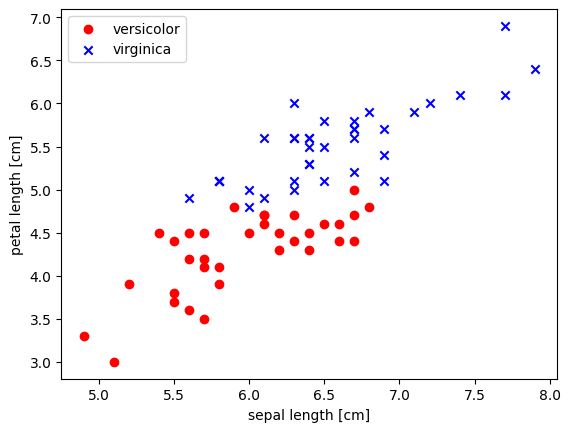

In [14]:
# plot data

plt.scatter(x_versicolor,y_versicolor,
            color='red', marker='o', label='versicolor')
plt.scatter(x_iris_virginica, y_iris_virginica,
            color='blue', marker='x', label='virginica')
            
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

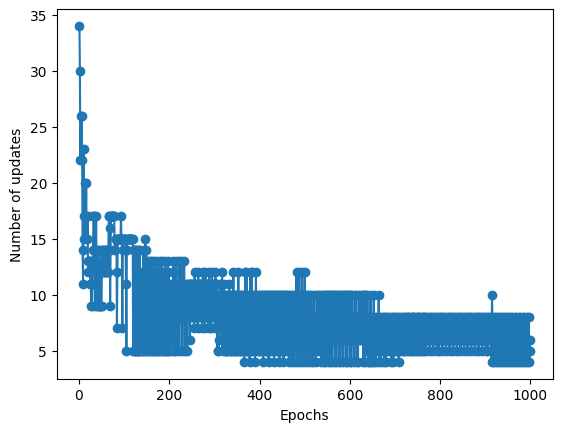

In [18]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [19]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\gsd391\AppData\Local\Temp\ipykernel_22760\3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


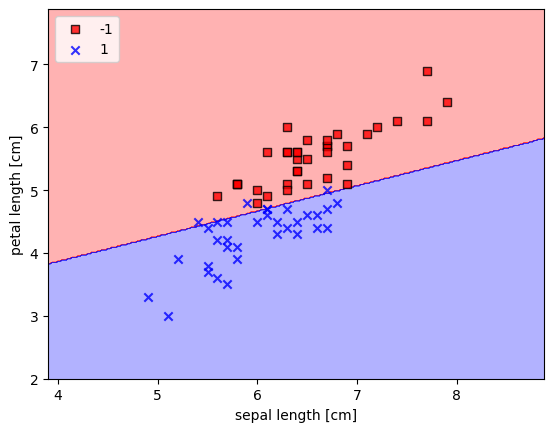

In [20]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [2]:
y

NameError: name 'y' is not defined